In [2]:
import json
import seaborn as sns
import pandas as  pd
import matplotlib.pyplot as plt
import pickle
import itertools
import numpy as np
import math

In [3]:
with open('users_df.pickle', 'rb') as handle:
    users_df = pickle.load(handle)

In [4]:
with open('elite_years_df.pickle', 'rb') as handle:
    elite_years_df = pickle.load(handle)

In [6]:
top_elite_users_df = elite_years_df.groupby('user_id').size().reset_index()
top_elite_users_df.columns = ['user_id', 'counts']
top_elite_users_df = top_elite_users_df.nlargest(200, 'counts')
top_elite_users_df.head(1)

,user_id,counts
684,-eVlHbM2KRZQnBqfTXtDvw,13


In [7]:
with open('review_df.pickle', 'rb') as handle:
    review_df = pickle.load(handle)
len(review_df)

5261669

In [8]:
elite_user_review_df = pd.DataFrame(pd.merge(review_df, top_elite_users_df, on='user_id'))

In [10]:
len(elite_user_review_df)

7236

In [11]:
elite_user_review5_df = pd.DataFrame(elite_user_review_df[elite_user_review_df['stars'] == 5])
len(elite_user_review5_df)

1707

In [12]:
elite_user_review5_df.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,counts
7,LYWbyu1EQM2o5hwHG5_Ldg,3,2012-11-07,0,0BwYIFIETIRA6zEgUEIB9Q,5,1098,3,NIhcRW6DWvk1JQhDhXwgOQ,12


In [14]:
year = elite_user_review5_df['date'].apply(lambda row: pd.to_datetime(row).year)
business_year_df = pd.DataFrame()
business_year_df['business_id'] = elite_user_review5_df['business_id']
business_year_df['year'] = year
business_year_df.head(1)

,business_id,year
7,LYWbyu1EQM2o5hwHG5_Ldg,2012


In [15]:
br_df = pd.DataFrame(pd.merge(business_year_df, review_df, on=['business_id']))
year_prv = br_df['date'].apply(lambda row: pd.to_datetime(row).year - 1)
year_nxt = br_df['date'].apply(lambda row: pd.to_datetime(row).year + 1)
br_df['year_p'] = year_prv
br_df['year_n'] = year_nxt
br_df.head(1)

,business_id,year,cool,date,funny,review_id,stars,text,useful,user_id,year_p,year_n
0,LYWbyu1EQM2o5hwHG5_Ldg,2012,2,2014-02-01,0,HNun0trl8jbIPvrJ58qvUA,3,1001,5,3wB-JjsUjkvdNUDRnChsVg,2013,2015


In [16]:
br_yp_df = pd.DataFrame(br_df[br_df['year'] == br_df['year_p']])
br_yn_df = pd.DataFrame(br_df[br_df['year'] == br_df['year_n']])

In [17]:
print(len(br_yp_df))
print(len(br_yn_df))
br_yn_df.head(1)

107893
81981


,business_id,year,cool,date,funny,review_id,stars,text,useful,user_id,year_p,year_n
5,LYWbyu1EQM2o5hwHG5_Ldg,2012,0,2011-04-24,1,0NbxSAx0HXquP1kHkyNzUg,5,892,2,CFyvX-AZh6cunAMu_zoF_w,2010,2012


In [18]:
br_yp_df = br_yp_df.groupby('business_id').agg({'stars' : np.mean}).reset_index()

br_yp_df = br_yp_df[br_yp_df['stars'] <= 3.5]

br_yn_df = br_yn_df.groupby('business_id').agg({'stars' : np.mean}).reset_index()

In [19]:
print(len(br_yp_df))
print(len(br_yn_df))
br_yp_df.head(2)

169
925


,business_id,stars
4,-BmqghX1sv7sgsxOIS2yAg,3.400000
9,-LzUYsR54hd8cCiYXTquRA,2.897436


In [20]:
br_yn_df.head(2)

,business_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4.125000
1,-3zffZUHoY8bQjGfPSoBKQ,3.918919


In [21]:
b_diff_df = pd.DataFrame(pd.merge(br_yp_df, br_yn_df, on='business_id'))

In [22]:
b_diff_df.head(1)

,business_id,stars_x,stars_y
0,-BmqghX1sv7sgsxOIS2yAg,3.4,4.052632


In [25]:
b_diff_df['diff'] = abs(b_diff_df['stars_y'] - b_diff_df['stars_x'])
na_b_diff_df = b_diff_df['stars_y'] - b_diff_df['stars_x']
year_p = list(b_diff_df['stars_x'])
year_n = list(b_diff_df['stars_y'])

In [26]:
def IQR(l):
    Q1 = l.quantile(.25)
    Q3 = l.quantile(.75)
    IQR = Q3 - Q1
    return [i for i in l if ((i >= Q1 - IQR*1.5) and (i <= Q3 + IQR*1.5))]

In [28]:
diff = na_b_diff_df

In [29]:
arr = np.array(diff)
mean = np.mean(arr)
mean

0.5637947921419715

In [30]:
std = np.std(arr)
std

0.9429989977189603

In [31]:
(mean - .5)/(std)/math.sqrt(len(diff))

0.006308485009737956

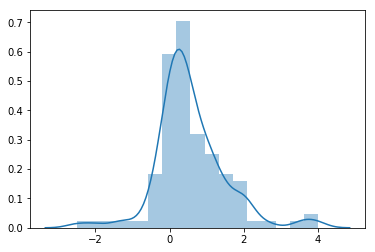

In [33]:
sns.distplot(arr)
plt.savefig('elite_review_effect_2.png')

In [27]:
len(year_p)
len(year_n)

115

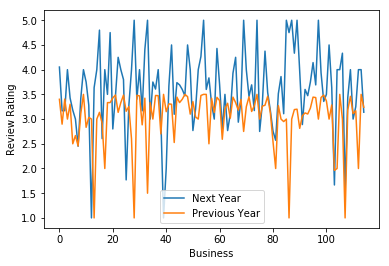

In [28]:
x = range(0, 115)
plt.plot(x, year_n, label="Next Year")
plt.plot(x, year_p, label="Previous Year")
plt.xlabel('Business')
plt.ylabel('Review Rating')
plt.legend()
plt.savefig('elite_review_effect_1.png')